## I am planning to explore altair as a visualization library to support my data analysis experiments with python-pandas. 
* This exercise assumes a very basic knowledge of python and jupyter notebook.
* Don't worry if you get stuck, you already know what to do when you are stuck :)
* Happy analysis & visualization

In [25]:
# for installation of altair and related dependency go to https://altair-viz.github.io/getting_started/installation.html
import altair as alt

# need to execute this once per session of notebook as at times charts are not rendered
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [71]:
# I have setup anaconda python 3.6 distribution on my machine, goto https://www.anaconda.com/download
import pandas as pd

## Load data
Using pandas read_csv load matches data and familiarize yourself with the data before beginning with the exploration

In [49]:
matches = pd.read_csv('/Users/vpranay/Documents/Github/python/python_altair_ipl/data/matches.csv')

In [50]:
matches.head()

id  season        city        date                  team1  \
0   1    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1   2    2008  Chandigarh  2008-04-19    Chennai Super Kings   
2   3    2008       Delhi  2008-04-19       Rajasthan Royals   
3   4    2008      Mumbai  2008-04-20         Mumbai Indians   
4   5    2008     Kolkata  2008-04-20        Deccan Chargers   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal           0          Chennai Super Kings           33   
2  normal           0             Delhi Daredevils            0   
3  normal           0  Royal Challengers Bangalore            0   
4  normal           0        Kolkata Knight Riders            0   

   win_by_wickets player_of_match                                       venue  \
0               0     BB McCullum                       M Chinnaswamy Stadium   
1               0      MEK Hussey  Punjab Cricket Association Stadium, Mohali   
2               9     MF Maharoof                            Feroz Shah Kotla   
3               5      MV Boucher                            Wankhede Stadium   
4               5       DJ Hussey                                Eden Gardens   

     umpire1         umpire2  umpire3  
0  Asad Rauf     RE Koertzen      NaN  
1  MR Benson      SL Shastri      NaN  
2  Aleem Dar  GA Pratapkumar      NaN  
3   SJ Davis       DJ Harper      NaN  
4  BF Bowden     K Hariharan      NaN

## Hello world equivalent in altair
The way to create visualization in altair is to 
* start with the altair module
* use chart object
* pass dataframe to it
* use mark (point, bar, line etc.)
* provide encodings

## Let us start with 1D chart
Since win_by_runs and win_by_wickets are the actual quantitative measures in the matches dataset, let us first use win_by_runs measure to plot a 1D chart as below.

As expected, in IPL (20 overs match) you can't expect teams to win by huge run margins and hence the density of points is much higher in the range 0 to 50 runs and hardly does one see points above 100. Though as an outlier a team has one with margin as big as 144 runs (Royal challenger bangalore winning against Gujarat lions in 2016 season)

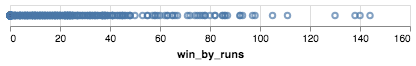

In [51]:
alt.Chart(matches).mark_point().encode(x='win_by_runs')

Rather than following a structured way to learn altair, I have decided to find out the features of altair on need basis based on what my analysis brings up.

Now the first plot above is not entirely meaningless and gave rise to another question in my mind.
### How closely matches are fought as far as win_by_runs margin is concerned acorss seasons?

* The answer to above question will give rise to our second chart (2D chart).
* Encode season on y axis and win_by_runs on x axis.
* Let us continue with point as mark and see what it throws out.

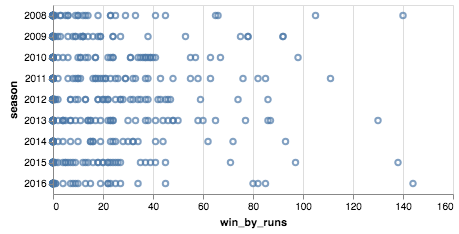

In [73]:
alt.Chart(matches).mark_point().encode(
    x='win_by_runs',
    y='season:O'
)

Now this is a much better chart than the first one. If you ignore the dots on the 0 mark (as it indicates win_by_wickets rather than win_by_runs) then you can clearly see that season 2009 and 2015 have seen quite a close match which were team chasing gave a lot of fight but in the end lost. If I were to somehow zoom into this chart and explore that further that would be even nicer. For that let us use **Interactive** feature of the chart. Expanding allows zooming into x axis scale with which one can clear see that in 2015 there were lots of matches which were lost by < 30 runs.

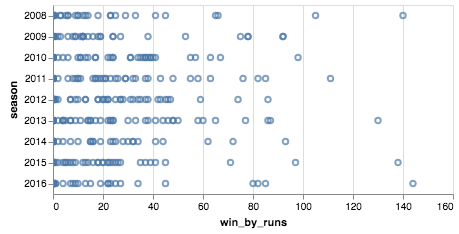

In [75]:
alt.Chart(matches).mark_point().encode(
    x='win_by_runs',
    y='season:O'
).interactive()

## Bar chart
Let us create a simple bar chart to find out how many matches were played per season.

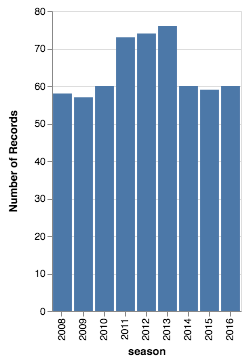

In [78]:
matches_per_season = alt.Chart(matches).mark_bar().encode(
    x='season:O',
    y='count()',
    tooltip='count()'
)
matches_per_season

* As you can see above we have used **y='count()'** to plot the number of matches played per season and have used one more enocoding channel **tooltip** which again displays the number of matches player in a sesson. Season has been treated as ordinal value and hence the notation **'season:O'**.
* Now some interpretation part, there are more number of matches played in season 2011 to 2013 as compared to other seasons. First glance at the data tells us that there played 10 or 9 teams in those seasons as compared to 8 which is normal team count. Just as an example put any season instead of 2013 and check the team count for yourself.

In [79]:
matches.query('season in [2013]')['team1'].nunique()

9

## to_dict and from_dict
* There is this interesting feature wherein you can convert the visualization into vegalite spec (including the data) in the form of a dictionary and store it and modify outside the system and can again reconstruct the visualization from it using from_dict.
* Or else on the internet if you find someone's visualization and can get access to chart object then can convert it to dict and reconstruct it in your notebook.

In [81]:
matches_per_season.to_dict()

{'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json',
 'config': {'view': {'height': 300, 'width': 400}},
 'data': {'values': [{'city': 'Bangalore',
    'date': '2008-04-18',
    'dl_applied': 0,
    'id': 1,
    'player_of_match': 'BB McCullum',
    'result': 'normal',
    'season': 2008,
    'team1': 'Kolkata Knight Riders',
    'team2': 'Royal Challengers Bangalore',
    'toss_decision': 'field',
    'toss_winner': 'Royal Challengers Bangalore',
    'umpire1': 'Asad Rauf',
    'umpire2': 'RE Koertzen',
    'umpire3': None,
    'venue': 'M Chinnaswamy Stadium',
    'win_by_runs': 140,
    'win_by_wickets': 0,
    'winner': 'Kolkata Knight Riders',
    'won_toss_won_match': 0},
   {'city': 'Chandigarh',
    'date': '2008-04-19',
    'dl_applied': 0,
    'id': 2,
    'player_of_match': 'MEK Hussey',
    'result': 'normal',
    'season': 2008,
    'team1': 'Chennai Super Kings',
    'team2': 'Kings XI Punjab',
    'toss_decision': 'bat',
    'toss_winner': 'Chennai Super Ki

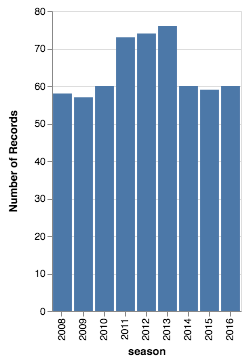

In [82]:
alt.Chart.from_dict(matches_per_season.to_dict())

Moving onto some other interesting questions..
## which city has seen the most number of IPL matches?

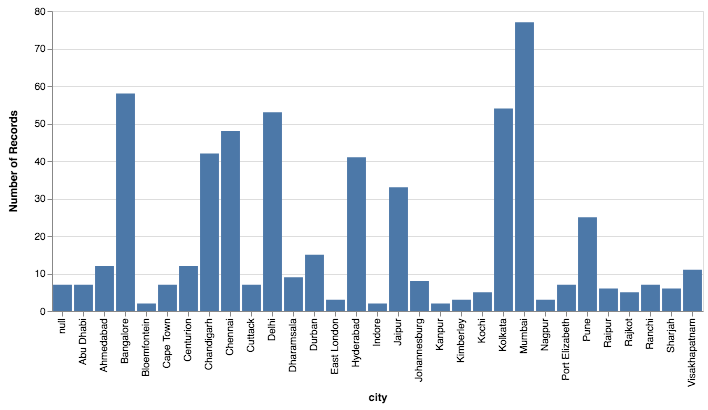

In [83]:
city_wise_matches = alt.Chart(matches).mark_bar().encode(
    x=alt.X('city'),
    y=alt.Y('count()'),
    tooltip='count()'
)
city_wise_matches

Clearly **Mumbai** it is. Wouldn't it be better if I could sort this bar chart in descending order to view the data in sorted fashion? Well SortField is at rescue this time. See below.
* Notice the different in specifying encoding channels x and y this time **alt.?**

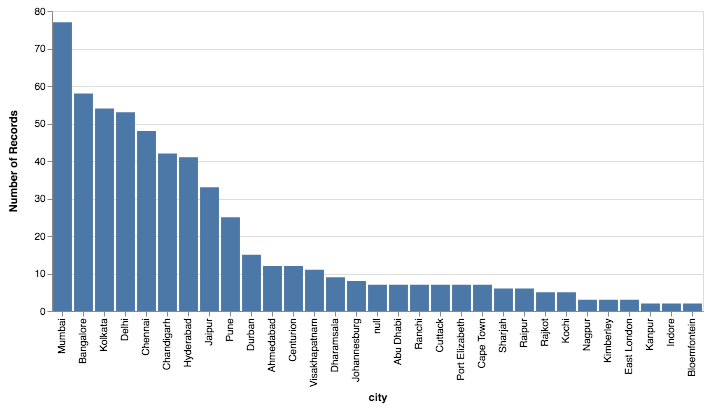

In [84]:
city_wise_matches = alt.Chart(matches).mark_bar().encode(
    x=alt.X('city',sort=alt.SortField(op="count", order="descending")),
    y=alt.Y('count()'),
)
city_wise_matches

Same question and chart repeated for **venue** below. Though Mumbai has seen the most number of IPL matches it is M Chinnaswamy stadium which hosted the most number of matches. Reason being Mumbai has couple of stadiums so matches got divided between them.

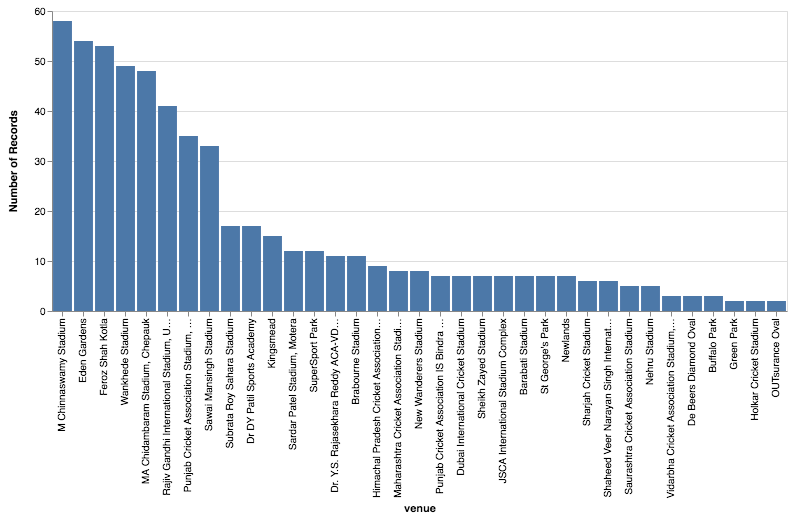

In [85]:
venue_wise_matches = alt.Chart(matches).mark_bar().encode(
    x=alt.X('venue',sort=alt.SortField(op="count", order="descending")),
    y=alt.Y('count()'),
    tooltip='city'
).interactive()
venue_wise_matches

## Can we say that team winning the toss has more chances of winning the game?
* Well let us find out.
* For this we will try to compute a new variable which indicates team winning the toss went on to win the match or not (1=won, 0 =lost)
* For this we will use transform_calculate for which we need to import altair.expr (expressions)
* It is interesting that we can add on-the-fly simple calculations in altair itself, though i could have easily computed this in the pandas dataframe itself

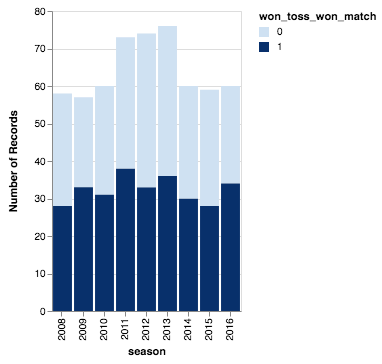

In [86]:
from altair.expr import datum, if_
team_winningtoss_winsmatch = alt.Chart(matches).mark_bar().encode(
    x='season:O',
    y='count()',
    color='won_toss_won_match:O'
).transform_calculate(
    won_toss_won_match = if_(datum.toss_winner==datum.winner, 1, 0)
)
team_winningtoss_winsmatch

### interpretation of the visual
* We have used the dynamic calculation for color channel, which indicates dark blue as the count of matches where team winning the toss went on to win the match. At a cursory glance it is evident that in season 2016, toss did play an important role as more than half of the matches were decided at the toss decision. But this chart is still hard as it puts lot of cognitive load on viewer's brain to determine what went with the toss thing for every season.
* Well based on my limited understanding of the altair and transformation it supports I feel that it is better to do complex transformation in pandas and then use altair for visualizing it, though I may not be still aware of the power of altair transformations yet. 
* Back to some pandas magic.

In [62]:
matches['won_toss_won_match']= matches.apply(lambda x: 1 if x['toss_winner']==x['winner'] else 0,axis=1)

In [63]:
matches.head(10)

id  season        city        date                  team1  \
0   1    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1   2    2008  Chandigarh  2008-04-19    Chennai Super Kings   
2   3    2008       Delhi  2008-04-19       Rajasthan Royals   
3   4    2008      Mumbai  2008-04-20         Mumbai Indians   
4   5    2008     Kolkata  2008-04-20        Deccan Chargers   
5   6    2008      Jaipur  2008-04-21        Kings XI Punjab   
6   7    2008   Hyderabad  2008-04-22        Deccan Chargers   
7   8    2008     Chennai  2008-04-23    Chennai Super Kings   
8   9    2008   Hyderabad  2008-04-24        Deccan Chargers   
9  10    2008  Chandigarh  2008-04-25        Kings XI Punjab   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   
5             Rajasthan Royals              Kings XI Punjab           bat   
6             Delhi Daredevils              Deccan Chargers           bat   
7               Mumbai Indians               Mumbai Indians         field   
8             Rajasthan Royals             Rajasthan Royals         field   
9               Mumbai Indians               Mumbai Indians         field   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal           0          Chennai Super Kings           33   
2  normal           0             Delhi Daredevils            0   
3  normal           0  Royal Challengers Bangalore            0   
4  normal           0        Kolkata Knight Riders            0   
5  normal           0             Rajasthan Royals            0   
6  normal           0             Delhi Daredevils            0   
7  normal           0          Chennai Super Kings            6   
8  normal           0             Rajasthan Royals            0   
9  normal           0              Kings XI Punjab           66   

   win_by_wickets player_of_match                                       venue  \
0               0     BB McCullum                       M Chinnaswamy Stadium   
1               0      MEK Hussey  Punjab Cricket Association Stadium, Mohali   
2               9     MF Maharoof                            Feroz Shah Kotla   
3               5      MV Boucher                            Wankhede Stadium   
4               5       DJ Hussey                                Eden Gardens   
5               6       SR Watson                      Sawai Mansingh Stadium   
6               9        V Sehwag   Rajiv Gandhi International Stadium, Uppal   
7               0       ML Hayden             MA Chidambaram Stadium, Chepauk   
8               3       YK Pathan   Rajiv Gandhi International Stadium, Uppal   
9               0   KC Sangakkara  Punjab Cricket Association Stadium, Mohali   

     umpire1         umpire2  umpire3  won_toss_won_match  
0  Asad Rauf     RE Koertzen      NaN                   0  
1  MR Benson      SL Shastri      NaN                   1  
2  Aleem Dar  GA Pratapkumar      NaN                   0  
3   SJ Davis       DJ Harper      NaN                   0  
4  BF Bowden     K Hariharan      NaN                   0  
5  Aleem Dar       RB Tiffin      NaN                   0  
6  IL Howell       AM Saheba      NaN                   0  
7  DJ Harper  GA Pratapkumar      NaN                   0  
8  Asad Rauf       MR Benson      NaN                   1  
9  Aleem Dar       AM Saheba      NaN                   0

In [87]:
groupedbyseason = matches.groupby(['season'])

In [88]:
won_percentage = groupedbyseason['won_toss_won_match'].sum()/groupedbyseason['id'].count()

In [89]:
type(won_percentage)

pandas.core.series.Series

In [90]:
df_won_percentage= won_percentage.to_frame(name='win_toss_win_match_perc').reset_index()
df_won_percentage

season  win_toss_win_match_perc
0    2008                 0.482759
1    2009                 0.578947
2    2010                 0.516667
3    2011                 0.520548
4    2012                 0.445946
5    2013                 0.473684
6    2014                 0.500000
7    2015                 0.474576
8    2016                 0.566667

### Well above I added a new column (1/0) to indicate team winning the toss won the match or not.
### I grouped the dataframe by season
### Calculated percentage of occurrence where team winning the toss won the match as well as compared to total matches played in the season
### Converted the series into dataframe and reset the index so that it can be consumed by altair

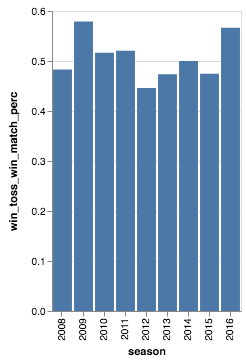

In [91]:
team_winningtoss_winsmatch = alt.Chart(df_won_percentage).mark_bar().encode(
    x='season:O',
    y='win_toss_win_match_perc',
    tooltip='win_toss_win_match_perc'
)
team_winningtoss_winsmatch

## Now it is much clear that season 2009 and 2016 were the two seasons where toss played an important part but rest of the seasons where leaning towards more theoratical probability distribution

### Next question
## Who won the most number of man of the match awards?

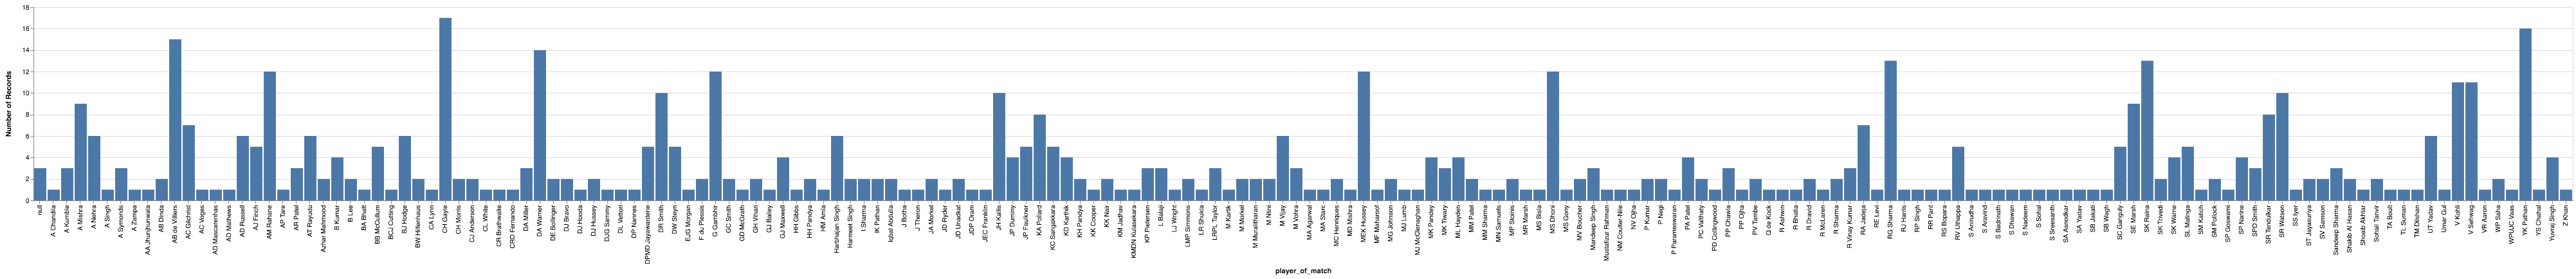

In [98]:
mom = alt.Chart(matches).mark_bar().encode(
    x='player_of_match',
    y='count()'
)
mom

Well there are soooo many players that I can't determine who won most number of MoM even there is horizontal scroll available. Let us sort the bars and then relook at the visualization.

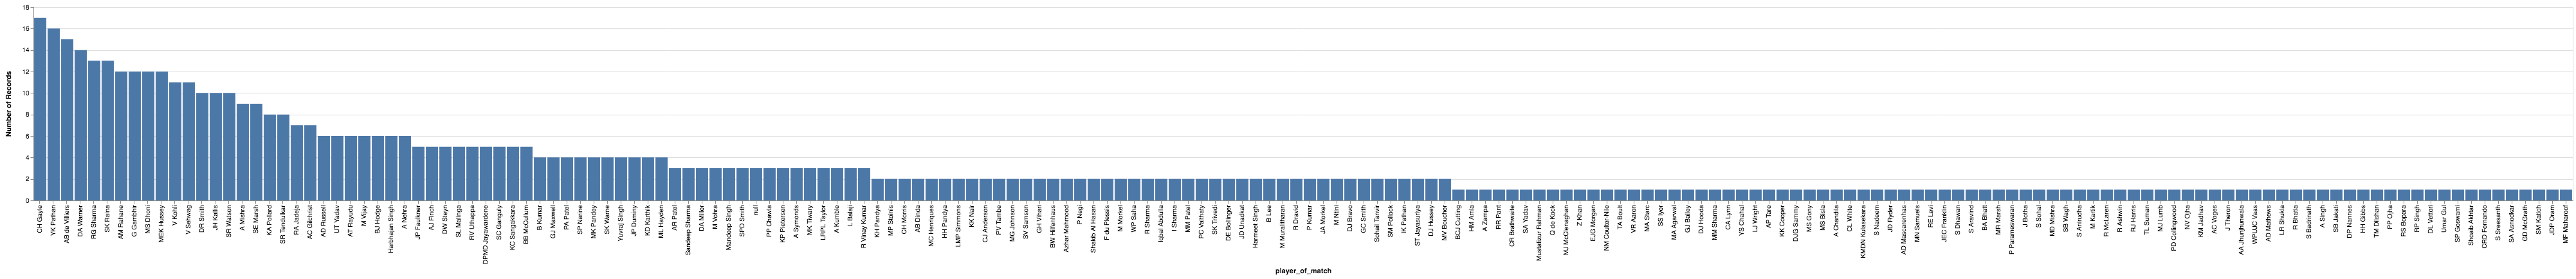

In [99]:
mom.encode(x=alt.X('player_of_match',sort=alt.SortField(op="count", order="descending")))

## Chris gayle sits at the top, I am pretty sure he would be number one in player hitting most number of sixes as well.
## Interestingly Yusuf Pathan is at 2nd place. I am neither big IPL fan nor do I watch matches everyday so I have definitely missed Yusuf's magic for sure.

Keep watching this workbook for more updates